In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy import stats

In [2]:
df = pd.read_csv("multipleChoiceResponses.csv", usecols = ['Q1','Q9','Q6'])
df.dropna(inplace=True)
indexNames = df[(df['Q9'] == 'I do not wish to disclose my approximate yearly compensation')].index
df.drop(indexNames , inplace=True)
indexNames = df[(df['Q1'] == 'Prefer not to say')].index
df.drop(indexNames , inplace=True)
indexNames = df[(df['Q1'] == 'Prefer to self-describe')].index
df.drop(indexNames , inplace=True)
indexNames = df[(df['Q6'] == 'Not employed')].index
df.drop(indexNames , inplace=True)
indexNames = df[(df['Q6'] == 'Student')].index
df.drop(indexNames , inplace=True)
clean_df=df.drop([0])
dic = {'0-10,000': 5000, '10-20,000': 15000, '20-30,000': 25000, '30-40,000': 35000,
       '40-50,000': 45000, '50-60,000': 55000, '60-70,000': 65000, '70-80,000': 75000,
       '80-90,000': 85000, '90-100,000': 95000, '100-125,000': 112500,
       '125-150,000': 137500, '150-200,000': 175000, '200-250,000': 225000,
       '250-300,000': 275000, '300-400,000': 350000, '400-500,000': 450000,
       '500,000+':500000}
clean_df['mid_salary'] = clean_df['Q9'].apply(lambda x: dic[x])
male_emp=clean_df.loc[clean_df["Q1"]=="Male"]
print("median of male employees: \t",male_emp['mid_salary'].median())
female_emp=clean_df.loc[clean_df["Q1"]=="Female"]
print("median of female employees: \t",female_emp['mid_salary'].median())

median of male employees: 	 45000.0
median of female employees: 	 35000.0


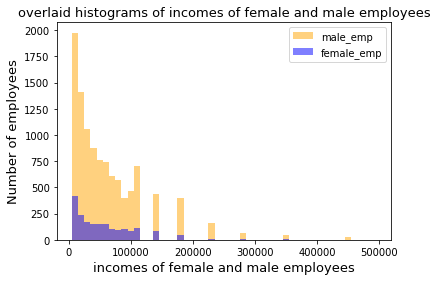

In [3]:
arr = np.arange(5000, 500000, 10000)
a = plt.hist(male_emp['mid_salary'],bins=arr,color="orange",rwidth=1,alpha=0.5,label="male_emp")
b = plt.hist(female_emp['mid_salary'],bins=arr,color="blue",rwidth=1,alpha=0.5,label="female_emp")
plt.xlabel("incomes of female and male employees",fontsize=13)
plt.ylabel("Number of employees",fontsize=13)
plt.title("overlaid histograms of incomes of female and male employees",fontsize=13)
plt.legend()
plt.show()

median of the sample: 	 35000.0


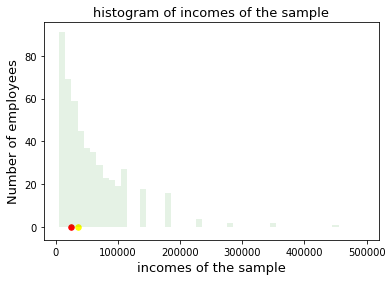

In [4]:
df_sample=clean_df.sample(n=500)
print("median of the sample: \t",df_sample['mid_salary'].median())
arr = np.arange(5000, 500000, 10000)
plt.hist(df_sample['mid_salary'],bins=arr,color="green",rwidth=1,alpha=0.1)
plt.xlabel("incomes of the sample",fontsize=13)
plt.ylabel("Number of employees",fontsize=13)
plt.title("histogram of incomes of the sample",fontsize=13)
plt.scatter(35000, 0, color='yellow', s=30);
plt.scatter(25000, 0, color='red', s=30);
plt.show()

In [5]:
#ensuring sampling strategy is fair
df_sample=clean_df.sample(n=500)
print("the percentage of male and female in total population is: \n")
print((clean_df['Q1'].value_counts()/clean_df['Q1'].count())*100)
print("the percentage of male and female in sample population is: \n")
print((df_sample['Q1'].value_counts()/df_sample['Q1'].count())*100)

the percentage of male and female in total population is: 

Male      84.896862
Female    15.103138
Name: Q1, dtype: float64
the percentage of male and female in sample population is: 

Male      84.2
Female    15.8
Name: Q1, dtype: float64


In [6]:
#Hypothesis testing starts
sample_male_emp=df_sample.loc[clean_df["Q1"]=="Male"]
sample_male_emp=sample_male_emp.loc[:,["Q1","mid_salary"]]

sample_female_emp=df_sample.loc[clean_df["Q1"]=="Female"]
sample_female_emp=sample_female_emp.loc[:,["Q1","mid_salary"]]

var_sample_male = sample_male_emp.loc[:,'mid_salary'].var()
var_sample_female = sample_female_emp.loc[:,'mid_salary'].var()
s = np.sqrt((var_sample_male + var_sample_female)/2)
t_stat = (sample_male_emp.loc[:,'mid_salary'].mean() - sample_female_emp.loc[:,'mid_salary'].mean())/(s*np.sqrt(2/500))
df = len(sample_male_emp)+len(sample_female_emp) -2
#significant level
alpha = 0.05
# setting confidence interval of 95%
t_critical = stats.t.ppf(1.0 - alpha, df)
p_value = (1.0 - stats.t.cdf(abs(t_stat), df)) * 2.0
print(p_value)

0.1432340923200175


In [7]:
# interpret via critical value
if abs(t_stat) <= t_critical:
    print('Accept null hypothesis that the means of incomes of male and female are equal.')
else:
    print('Reject the null hypothesis that the means of incomes of male and female are equal.')

Accept null hypothesis that the means of incomes of male and female are equal.


In [8]:
# interpret via p-value
if p_value > alpha:
    print('Accept null hypothesis that the means of incomes of male and female are equal.')
else:
    print('Reject the null hypothesis that the means of incomes of male and female are equal.')


Accept null hypothesis that the means of incomes of male and female are equal.


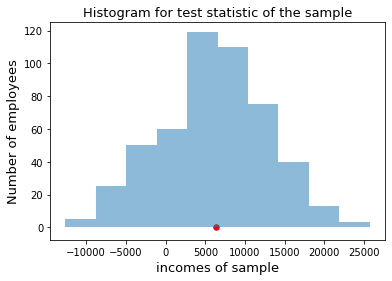

In [9]:
genderincome_df = clean_df.loc[:,['Q1','mid_salary']]
diffmeanslist = []
diffmeans = np.array(diffmeanslist)
for i in range(500):
    sampledf = genderincome_df.sample(n=500)
    sampledfmeans = sampledf.groupby(['Q1']).mean()
    diffmeans = np.append(diffmeans,sampledfmeans.iloc[1]['mid_salary'] - sampledfmeans.iloc[0]['mid_salary'] )
population_mean = genderincome_df.groupby(['Q1']).mean()
observed_statistic = population_mean.iloc[1]['mid_salary'] - population_mean.iloc[0]['mid_salary']
plt.hist(diffmeans, bins = 10, alpha=0.5, label='Income')
plt.xlabel("incomes of sample",fontsize=13)
plt.ylabel("Number of employees",fontsize=13)
plt.title("Histogram for test statistic of the sample",fontsize=13)
plt.scatter(observed_statistic, 0, color='red', s=30)

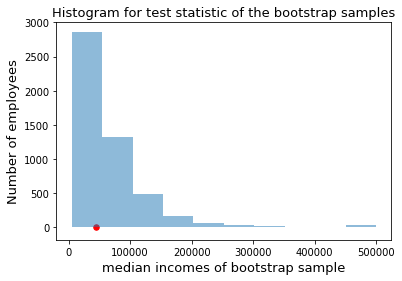

In [10]:
def bootstrap_median(original_sample, label, replications):
    just_one_column = genderincome_df[['mid_salary']]
    medians = []
    medians = np.array(medians)
    for i in np.arange(replications):
        bootstrap_sample = just_one_column.sample()
        resampled_median = bootstrap_sample.median()
        medians = np.append(medians, resampled_median)
        
    return medians

our_sample = genderincome_df.sample(500, replace = False)
income = our_sample[["mid_salary"]].to_numpy()
bstrap_medians = bootstrap_median(our_sample, 'Income', 5000)
plt.hist(bstrap_medians, bins = 10, alpha=0.5, label='Income')
plt.xlabel("median incomes of bootstrap sample",fontsize=13)
plt.ylabel("Number of employees",fontsize=13)
plt.title("Histogram for test statistic of the bootstrap samples",fontsize=13)

observed_median = genderincome_df[['mid_salary']].median()

plt.scatter(observed_median, 0, color='red', s=30)